In [ ]:
#acs-trigger-rate

In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt

%matplotlib inline


In [68]:
import re


log_lines = []

for l in open("/home/savchenk/work/integral/ibas/ibas-cgi-bin/offline/var/log/ibas_acsmonitor_log.txt"):
    if re.match(".*? +2021-01*?", l):
        log_lines.append(l)
        
recent_log = "\n".join(log_lines)
        

In [3]:
import time

In [70]:
events=[]

for l in recent_log.split("\n"):
    for n, rex in [
        (
            '0 - pre-detection',
            '^.*? +(?P<date>2021.*?) .*?Main_Vfy: The best burst is:  OBT=(?P<obt>.*?)  s=(?P<sigma>.*?)  bgrd=(?P<background>[0-9\.]*)'
        ),
        (
            '1 - background-out-of-range',
            '^.*? +(?P<date>2021.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]+?) is out of range <5400.0 : 7500.0>'
        ),
        (
            '2 - background-in-range',
            '^.*? +(?P<date>2021.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]*?) is in acceptable range <5400.0 : 7500.0>'
        ),
        (
            '3 - sc-distance-out-of-range',
            '^.*? +(?P<date>2021.*?) .*?Main_Vfy: S/C distance (?P<scdistance>[0-9\.]*?) is out of range <7000.0 : 100000.0>'
        ),
        (
            '9 - distributed-detection',
            '^.*? +(?P<date>2021.*?) .*?LC/EPH: OBT=(.*?) past=(.*?) future=(.*?) delay=(.*?) fname=.*?'
        )
    ]:
        r = re.search(rex, l)
        if r:
            R = r.groupdict()
            print(n, R)
            events.append(
                dict(
                    event=n,
                    date=R['date'],
                    time_s=time.mktime(time.strptime(R['date'], "%Y-%m-%dT%H:%M:%S"))
                )
            )

0 - pre-detection {'date': '2021-01-13T07:10:50', 'obt': '44655846.293', 'sigma': '9.114', 'background': '6444.3'}
2 - background-in-range {'date': '2021-01-13T07:10:50', 'background': '6444.3'}
3 - sc-distance-out-of-range {'date': '2021-01-13T07:10:50', 'scdistance': '85908.1'}
0 - pre-detection {'date': '2021-01-13T08:13:06', 'obt': '44659584.343', 'sigma': '6.418', 'background': '6442.9'}
2 - background-in-range {'date': '2021-01-13T08:13:06', 'background': '6442.9'}
3 - sc-distance-out-of-range {'date': '2021-01-13T08:13:06', 'scdistance': '78581.5'}
0 - pre-detection {'date': '2021-01-13T08:24:26', 'obt': '44660258.443', 'sigma': '9.089', 'background': '6501.6'}
2 - background-in-range {'date': '2021-01-13T08:24:26', 'background': '6501.6'}
3 - sc-distance-out-of-range {'date': '2021-01-13T08:24:26', 'scdistance': '77187.0'}
0 - pre-detection {'date': '2021-01-13T08:24:34', 'obt': '44660281.543', 'sigma': '16.664', 'background': '6624.3'}
2 - background-in-range {'date': '2021-01

0 - pre-detection {'date': '2021-01-18T17:27:15', 'obt': '45124822.543', 'sigma': '8.729', 'background': '6512.7'}
2 - background-in-range {'date': '2021-01-18T17:27:15', 'background': '6512.7'}
3 - sc-distance-out-of-range {'date': '2021-01-18T17:27:15', 'scdistance': '66670.1'}
0 - pre-detection {'date': '2021-01-18T17:35:40', 'obt': '45125322.393', 'sigma': '6.014', 'background': '6579.2'}
2 - background-in-range {'date': '2021-01-18T17:35:40', 'background': '6579.2'}
3 - sc-distance-out-of-range {'date': '2021-01-18T17:35:40', 'scdistance': '65474.9'}
0 - pre-detection {'date': '2021-01-22T18:18:27', 'obt': '45473545.043', 'sigma': '9.675', 'background': '6717.4'}
2 - background-in-range {'date': '2021-01-22T18:18:27', 'background': '6717.4'}
9 - distributed-detection {'date': '2021-01-22T18:18:27'}
0 - pre-detection {'date': '2021-01-22T21:32:52', 'obt': '45485208.193', 'sigma': '7.818', 'background': '6663.1'}
2 - background-in-range {'date': '2021-01-22T21:32:52', 'background': 

0 - pre-detection {'date': '2021-02-08T23:24:20', 'obt': '46960643.943', 'sigma': '9.023', 'background': '10126.1'}
1 - background-out-of-range {'date': '2021-02-08T23:24:20', 'background': '10126.1'}
0 - pre-detection {'date': '2021-02-08T23:27:32', 'obt': '46960851.443', 'sigma': '12.427', 'background': '10453.7'}
1 - background-out-of-range {'date': '2021-02-08T23:27:32', 'background': '10453.7'}
0 - pre-detection {'date': '2021-02-08T23:27:39', 'obt': '46960856.843', 'sigma': '20.005', 'background': '10562.3'}
1 - background-out-of-range {'date': '2021-02-08T23:27:39', 'background': '10562.3'}
0 - pre-detection {'date': '2021-02-08T23:28:20', 'obt': '46960882.043', 'sigma': '134.571', 'background': '10649.8'}
1 - background-out-of-range {'date': '2021-02-08T23:28:20', 'background': '10649.8'}
0 - pre-detection {'date': '2021-02-08T23:30:44', 'obt': '46961056.093', 'sigma': '10.171', 'background': '10321.3'}
1 - background-out-of-range {'date': '2021-02-08T23:30:44', 'background': '

0 - pre-detection {'date': '2021-02-14T03:51:48', 'obt': '47408708.593', 'sigma': '6.576', 'background': '6393.2'}
2 - background-in-range {'date': '2021-02-14T03:51:48', 'background': '6393.2'}
3 - sc-distance-out-of-range {'date': '2021-02-14T03:51:48', 'scdistance': '95806.4'}
0 - pre-detection {'date': '2021-02-14T04:01:16', 'obt': '47409268.743', 'sigma': '9.177', 'background': '6465.7'}
2 - background-in-range {'date': '2021-02-14T04:01:16', 'background': '6465.7'}
3 - sc-distance-out-of-range {'date': '2021-02-14T04:01:16', 'scdistance': '94874.2'}
0 - pre-detection {'date': '2021-02-14T04:11:56', 'obt': '47409904.543', 'sigma': '9.252', 'background': '6407.1'}
2 - background-in-range {'date': '2021-02-14T04:11:56', 'background': '6407.1'}
3 - sc-distance-out-of-range {'date': '2021-02-14T04:11:56', 'scdistance': '93802.0'}
0 - pre-detection {'date': '2021-02-14T04:48:53', 'obt': '47412133.943', 'sigma': '9.005', 'background': '6412.8'}
2 - background-in-range {'date': '2021-02-

2 - background-in-range {'date': '2021-02-14T07:55:00', 'background': '6651.9'}
3 - sc-distance-out-of-range {'date': '2021-02-14T07:55:00', 'scdistance': '67007.1'}
0 - pre-detection {'date': '2021-02-14T07:55:32', 'obt': '47423315.393', 'sigma': '19.143', 'background': '6704.4'}
2 - background-in-range {'date': '2021-02-14T07:55:32', 'background': '6704.4'}
3 - sc-distance-out-of-range {'date': '2021-02-14T07:55:32', 'scdistance': '66965.9'}
0 - pre-detection {'date': '2021-02-16T08:23:09', 'obt': '47597812.443', 'sigma': '9.274', 'background': '6490.1'}
2 - background-in-range {'date': '2021-02-16T08:23:09', 'background': '6490.1'}
9 - distributed-detection {'date': '2021-02-16T08:23:09'}
0 - pre-detection {'date': '2021-02-16T08:23:09', 'obt': '47597813.493', 'sigma': '10.200', 'background': '6487.7'}
2 - background-in-range {'date': '2021-02-16T08:23:09', 'background': '6487.7'}
9 - distributed-detection {'date': '2021-02-16T08:23:09'}
0 - pre-detection {'date': '2021-02-16T18:44:

0 - pre-detection {'date': '2021-02-21T20:18:29', 'obt': '48072699.243', 'sigma': '6.067', 'background': '6506.3'}
2 - background-in-range {'date': '2021-02-21T20:18:29', 'background': '6506.3'}
9 - distributed-detection {'date': '2021-02-21T20:18:29'}
0 - pre-detection {'date': '2021-02-21T23:00:45', 'obt': '48082434.393', 'sigma': '9.370', 'background': '6485.4'}
2 - background-in-range {'date': '2021-02-21T23:00:45', 'background': '6485.4'}
9 - distributed-detection {'date': '2021-02-21T23:00:45'}
0 - pre-detection {'date': '2021-02-21T23:09:01', 'obt': '48082924.243', 'sigma': '9.586', 'background': '6505.3'}
2 - background-in-range {'date': '2021-02-21T23:09:01', 'background': '6505.3'}
9 - distributed-detection {'date': '2021-02-21T23:09:01'}
0 - pre-detection {'date': '2021-02-21T23:09:01', 'obt': '48082925.193', 'sigma': '9.277', 'background': '6499.6'}
2 - background-in-range {'date': '2021-02-21T23:09:01', 'background': '6499.6'}
9 - distributed-detection {'date': '2021-02-21

3 - sc-distance-out-of-range {'date': '2021-02-22T02:57:49', 'scdistance': '98785.6'}
0 - pre-detection {'date': '2021-02-22T03:01:49', 'obt': '48096899.793', 'sigma': '9.270', 'background': '6595.0'}
2 - background-in-range {'date': '2021-02-22T03:01:49', 'background': '6595.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T03:01:49', 'scdistance': '98403.9'}
0 - pre-detection {'date': '2021-02-22T03:09:57', 'obt': '48097379.593', 'sigma': '6.199', 'background': '6596.1'}
2 - background-in-range {'date': '2021-02-22T03:09:57', 'background': '6596.1'}
3 - sc-distance-out-of-range {'date': '2021-02-22T03:09:57', 'scdistance': '97633.5'}
0 - pre-detection {'date': '2021-02-22T03:13:40', 'obt': '48097611.293', 'sigma': '6.088', 'background': '6524.6'}
2 - background-in-range {'date': '2021-02-22T03:13:40', 'background': '6524.6'}
3 - sc-distance-out-of-range {'date': '2021-02-22T03:13:40', 'scdistance': '97258.7'}
0 - pre-detection {'date': '2021-02-22T03:13:57', 'obt': '48097619.843'

3 - sc-distance-out-of-range {'date': '2021-02-22T04:35:16', 'scdistance': '88866.9'}
0 - pre-detection {'date': '2021-02-22T04:43:09', 'obt': '48102982.543', 'sigma': '9.048', 'background': '6844.3'}
2 - background-in-range {'date': '2021-02-22T04:43:09', 'background': '6844.3'}
3 - sc-distance-out-of-range {'date': '2021-02-22T04:43:09', 'scdistance': '88004.9'}
0 - pre-detection {'date': '2021-02-22T04:52:36', 'obt': '48103551.093', 'sigma': '6.433', 'background': '6700.6'}
2 - background-in-range {'date': '2021-02-22T04:52:36', 'background': '6700.6'}
3 - sc-distance-out-of-range {'date': '2021-02-22T04:52:36', 'scdistance': '86957.6'}
0 - pre-detection {'date': '2021-02-22T04:57:48', 'obt': '48103886.443', 'sigma': '13.478', 'background': '6893.8'}
2 - background-in-range {'date': '2021-02-22T04:57:48', 'background': '6893.8'}
3 - sc-distance-out-of-range {'date': '2021-02-22T04:57:48', 'scdistance': '86333.4'}
0 - pre-detection {'date': '2021-02-22T04:59:17', 'obt': '48103967.343

0 - pre-detection {'date': '2021-02-22T06:20:53', 'obt': '48108850.793', 'sigma': '9.037', 'background': '7675.2'}
1 - background-out-of-range {'date': '2021-02-22T06:20:53', 'background': '7675.2'}
0 - pre-detection {'date': '2021-02-22T06:23:57', 'obt': '48109031.043', 'sigma': '9.162', 'background': '8101.6'}
1 - background-out-of-range {'date': '2021-02-22T06:23:57', 'background': '8101.6'}
0 - pre-detection {'date': '2021-02-22T06:25:41', 'obt': '48109140.143', 'sigma': '42.689', 'background': '8991.0'}
1 - background-out-of-range {'date': '2021-02-22T06:25:41', 'background': '8991.0'}
0 - pre-detection {'date': '2021-02-22T06:26:28', 'obt': '48109170.743', 'sigma': '135.861', 'background': '9168.2'}
1 - background-out-of-range {'date': '2021-02-22T06:26:28', 'background': '9168.2'}
0 - pre-detection {'date': '2021-02-22T06:29:48', 'obt': '48109382.343', 'sigma': '54.829', 'background': '8223.0'}
1 - background-out-of-range {'date': '2021-02-22T06:29:48', 'background': '8223.0'}
0

In [15]:
import numpy as np

In [ ]:
import 

In [45]:
t0 = time.strptime("2021-02-22T00:00:00", "%Y-%m-%dT%H:%M:%S")
t0_s = time.mktime(t0)

0 - pre-detection 332
1 - background-out-of-range 101
2 - background-in-range 231
3 - sc-distance-out-of-range 187
9 - distributed-detection 44


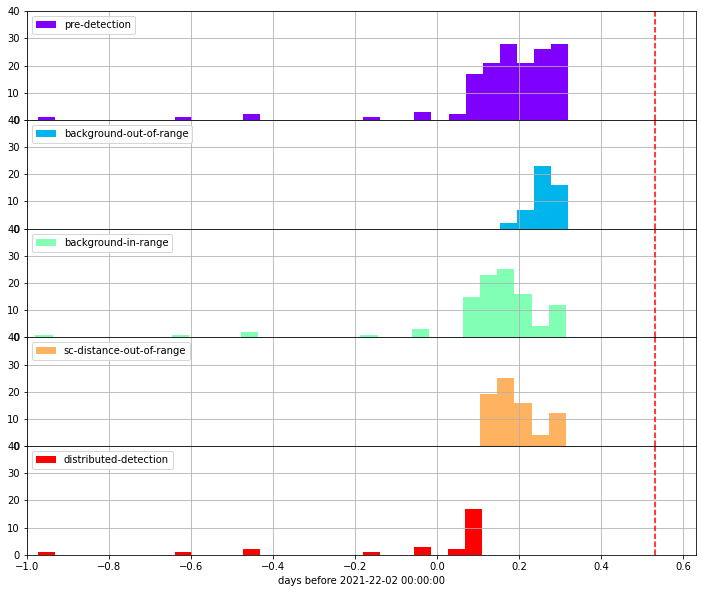

In [72]:
from matplotlib.pyplot import cm
cm.rainbow

all_kinds = sorted(set([ e['event'] for e in events ]))
colors = cm.rainbow(np.linspace(0,1,len(all_kinds)))

f, axes = plt.subplots(len(all_kinds),1, figsize=(12,10), sharex=True)

for i_kind, (event_kind, ax, color) in enumerate(zip(all_kinds, axes, colors)):    
    _events = [e for e in events if e['event'] == event_kind]
    print(event_kind, len(_events))
    
    t = np.array([e['time_s'] for e in _events])
    
    ax.hist(        
        (t-t0_s)/24./3600.,
#        [i_kind for e in _events],
        label=event_kind.split()[-1],
        bins=int((t.max()-t.min())/3600),
        color=color,
    )
    
    ax.set_ylim([0,40])
    
    ax.legend(loc=2)
    
    ax.grid(True)
    
    ax.axvline((time.time() -t0_s)/24./3600., c='r', ls='--')
    
plt.subplots_adjust(hspace=0)

plt.xlabel(f"days before {time.strftime('%Y-%d-%m %H:%M:%S', t0)}")

plt.xlim([-15, 
          (time.time() -t0_s)/24./3600. + 0.1])

plt.savefig("incident-past-history.png")

plt.xlim([-1, 
          (time.time() -t0_s)/24./3600. + 0.1])

plt.savefig("incident-log.png")
